# **Домашнее задание №2**

В этом домашнем задании на примере задачи распознавания лиц Вам предлагается использовать функцию потерь [ArcFace](https://arxiv.org/abs/1801.07698) для решения задачи Metric Learning. Подробное описание задачи вы можете найти в соответствующем разделе домашнего задания.  

**Ваша задача:** Обучить две модели для предсказания дискриминативных представлений изображений, $\textbf{z}\in\mathbb{R}^{2}$, с помощью функции потерь SoftMax и функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698) (см. описание задачи ниже). Модели необходимо обучить на 8-ми самых многочисленных классах из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_).  

Затем нужно изобразить полученные представления на двух рисунках (один для SoftMax другой для ArcFace функций потерь).

Рисунок для SoftMax функции будет вам дан.  
**Вспомогательный код для загрузки данных и для обучения модели с помощью SoftMax функции потерь вы можете найти в разделе с заданием.**  

**Вопрос на который требуется ответить:** Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений?


## **Задача: обучить небольшой ArcFace модели (1 балл)**

При решении задачи распознавания лиц возникает необходимость ответить на вопрос: изображен ли на двух разных картинках один и тот же человек или нет?  На этот вопрос можно ответить с помощью функции расстояния между изображениями, учитывающую абстрактную семантическую информацию.  

Современные методы распознавания лиц используют большие наборы данных, содержащие изображения разных людей, для обучения нейросетей, вычисляющих "осмысленные" вектора представлений изображений лиц. Для каждого изображения лица человека $\textbf{x}$ с помощью обучаемой функции $f_{\theta}(*)$ вычисляется вектор представления $\textbf{x}$:
$$
\textbf{z} = f_{\theta}(\textbf{x})
$$
Параметры $\theta$ модели подбираются так, чтобы расстояние между векторами представлений изображений разных людей было велико, а между представлениями изображений одного и того же человека -- низко:
$$
d(\textbf{z}_i,\textbf{z}_j)>>d(\textbf{z}_i,\textbf{z}'_i)
$$
где $d$ -- некоторая функция расстояния, например, косинусное расстояние:
$$
d(\textbf{z}_i,\textbf{z}_j) = -\frac{\langle\textbf{z}_i,\textbf{z}_j\rangle}{\left\lVert\textbf{z}_i\right\rVert\left\lVert\textbf{z}_j\right\rVert}.
$$

В терминах языка python, если взять id за идентификатор личности, мы хотим получить следующее поведение: $\mathbf{id}(\textbf{x}_i)=\mathbf{id}(\textbf{x}'_i),\,\mathbf{id}(\textbf{x}_i)\neq\mathbf{id}(\textbf{x}_j)$.

Для получения искомых представлений можно решать задачу классификации на большом наборе данных с изображениями разных людей, а затем использовать вектор перед последним линейным слоем как вектор представления лица. В такой постановке каждый человек в наборе данных рассматривается как отдельный класс, а множество изображений его лица -- как представители этого класса.

Для решения задачи многоклассовой классификации можно использовать стандартную SoftMax функцию потерь:
$$
    L = -\frac{1}{N}\sum_{i=1}^N\log\frac{e^{W_{y_i}^T\textbf{z}_i + b_{y_i}}}{\sum_{j=1}^ne^{W_{j}^T\textbf{z}_i + b_{j}}}
$$
$\textbf{z}_i$ -- представление изображения, $N$ -- число изображений в мини батче, $W_j, b_j$ -- параметры весов (гиперплоскости) для каждого класса, $y_i$ -- индекс настоящего класса объекта.

Если мы отнормируем вектор $\textbf{x}$ так, чтобы он имел ограниченную норму $s$, положим норму вектора $W_j$ равную 1, а $b_j = 0$, то функция потерь может быть переписана в следующей форме:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos\theta_{y_i}}}
{e^{s\cos\theta_{y_i}} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}},
$$
где $\theta_j$ - угол между представлением $i$-го изображения и вектором $W_j$ указывающим на центр $j$-го класса.

Мы можем видеть, что здесь максимизируется косинус угла между представлением и соответствующим вектором класса.
На самом деле мы хотим минимизировать сам угол, а не максимизировать его косинус, потому что угол лучше соответствует близости в пространстве представлений.

Для решения этой задачи предлагается [ArcFace](https://arxiv.org/abs/1801.07698) функция потерь:
$$
L = -\frac{1}{N}\sum_{i=1}^N
\log
\frac{e^{s\cos(\theta_{y_i}+m)}}
{e^{s\cos(\theta_{y_i}+m)} + \sum_{j\neq y_i}^ne^{s\cos\theta_{j}}},
$$
где вводится параметр отступа $m=0.5$.

**Ваша цель:** Исследовать, как функция потерь влияет на качество получаемых представлений изображений лиц.

Для этого необходимо:

1. Обучить две глубокие модели для получения 2-мерных дискриминативных представлений изображений: первую - с помощью функции потерь SoftMax, а вторую - с помощью функции из статьи [ArcFace](https://arxiv.org/abs/1801.07698). Для обучения предлагается использовать изображения 8-ми самых многочисленных классов из набора изображений лиц [MS1M-ArcFace](https://github.com/deepinsight/insightface/tree/master/recognition/_datasets_). В качестве модели предлагается использовать архитектуру iResNet50, код модели предоставлен в файле ```iresnet.py```. Вспомогательный код для загрузки данных, инициализации и обучения модели с помощью SoftMax функции потерь вы можете найти ниже. Вторую функцию потерь необходимо реализовать самостоятельно. **(0,25 балла)**
    
2. Оценить качество полученных двумерных представлений изображений визуально, изобразив их на окружности в $\mathbb{R}^2$. Визуализация представлений, полученных с помощью SoftMax функции приведена в ноутбуке ниже.**(0,25 балла)**
    
3. В качестве объективной метрики качества посчитать среднее расстояние от представлений изображений одного класса до центра класса. Помогает ли функция потерь ArcFace для улучшения дикриминативных способностей векторов представлений? **(0,25 балла)**

4. Изучить, как выбор гиперпараметров функции потерь ArcFace (значения нормы $s$ и отступа $m$) влияет на процесс обучения модели и качество полученных представлений. Удается ли получить хорошие представления при $m \neq 0.5$? **(0,25 балла)**

# **Бонусные задания:**

1. Решить ту же задачу для 3-мерного пространства представлений $\textbf{z}_{i}\in\mathbb{R}^{3}$, визуализировать полученные представления на шаре. **(0,25 балла)**

2. Реализовать [Triplet Loss](https://arxiv.org/abs/1503.03832) и обучить модель с его помощью. Сравнить полученные результаты. **(0,25 балла)**

Удачи!

### Загрузка данных

<!-- Загрузите выборку MS1M-ArcFace, и распакуйте данные в текущей дериктории:
https://drive.google.com/file/d/1SXS4-Am3bsKSK615qbYdbA_FMVh3sAvR/view. Если вы хотите сделать это напрямую в коде, можете воспользоваться командами, закомментированными в ячейке ниже. -->

In [2]:
!wget -nc https://dl.dropboxusercontent.com/s/a53udei76f9h270/ms1m_subset.zip
!unzip ms1m_subset.zip

--2023-07-24 12:34:59--  https://dl.dropboxusercontent.com/s/a53udei76f9h270/ms1m_subset.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6035:15::a27d:550f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102620237 (98M) [application/zip]
Saving to: ‘ms1m_subset.zip’

ms1m_subset.zip     100%[===================>]  97.87M  16.4MB/s    in 6.1s    

2023-07-24 12:35:07 (16.1 MB/s) - ‘ms1m_subset.zip’ saved [102620237/102620237]

Archive:  ms1m_subset.zip
   creating: ms1m_subset/
  inflating: ms1m_subset/train.rec   
  inflating: ms1m_subset/train.idx   
  inflating: ms1m_subset/labels.npy  


Если вы работаете в Google Colab'е, то вам может потребоваться установить следующие библиотеки, которых там нет по умолчанию:

In [3]:
!pip install pytorch_lightning
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.4/722.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


### Импортируем необходимые библиотеки

Обратите внимание, что мы используем модель iresnet50_normalized, которая определена в файле ```iresnet.py```. Для того чтобы ее импортировать, необходимо положить этот файл в одну папку с данным ноутбуком.

In [1]:
import numpy as np
import mxnet as mx

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning import Trainer

import math
import numbers
import os

from tqdm import tqdm
from pathlib import Path
from typing import Tuple, Optional, Dict

### Датасет

Ниже определен класс с необходимым нам датасетом изображений лиц. Обратите внимание, что он наследуется от класса ```torch.utils.data.Dataset```.

In [2]:
class ArcFaceDataset(Dataset):
    """
    ArcFace dataset loader,
    based on https://github.com/deepinsight/insightface/blob/master/recognition/arcface_torch/dataset.py
    """
    def __init__(self, root_dir: str, num_labels: int, test: bool = False) -> None:

        """Initialize ArcFace Dataset.

        :param root_dir: path to the folder containing face images
        :param num_labels: number of classes (people) to be used
        :param test: if True, create test dataset (no augmentations, no labels)
        """
        super(ArcFaceDataset, self).__init__()

        self.test = test

        # for test dataset, use default transformations (conver to torch.Tensor and normalize),
        # do not use augmentations
        if self.test:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        # for train dataset, add augmentations of images (Random horizontal flip)
        else:
            self.transform = transforms.Compose(
                [
                    transforms.ToPILImage(),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                ]
            )

        self.root_dir = root_dir
        path_imgrec = os.path.join(root_dir, "train.rec")
        path_imgidx = os.path.join(root_dir, "train.idx")

        # load pictures
        self.imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, "r")
        s = self.imgrec.read_idx(0)
        header, _ = mx.recordio.unpack(s)

        self.imgidx = np.array(range(1, int(header.label[0])))

        # load or create labels
        labels_path = Path(root_dir) / "labels.npy"
        if labels_path.is_file():
            self.labels = np.load(labels_path)
        else:
            print('Listing labels...')
            labels = []
            for i in tqdm(range(len(self.imgidx))):
                idx = self.imgidx[i]
                s = self.imgrec.read_idx(idx)
                header, img = mx.recordio.unpack(s)
                label = header.label
                labels.append(int(label))
            self.labels = np.array(labels)
            # save labels
            np.save(labels_path, self.labels)

        unique_labels, unique_counts = np.unique(self.labels, return_counts=True)
        top_ids = np.argsort(unique_counts)[::-1][:num_labels]
        self.top_labels = unique_labels[top_ids]

        self.label_map = dict(
            zip(self.top_labels.tolist(), np.arange(len(self.top_labels)))
        )

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, Optional[int]]:
        """Get item of a dataset.

        :param index: index of an item
        :return:
            - a tuple (image, label) for the train dataset
            - image for tht test dataset
        """
        idx = self.imgidx[index]
        s = self.imgrec.read_idx(idx)
        header, img = mx.recordio.unpack(s)
        label = header.label

        if not isinstance(label, numbers.Number):
            label = label[0]

        label = self.label_map[int(label)]
        label = torch.tensor(label, dtype=torch.long)
        sample = mx.image.imdecode(img).asnumpy()

        if self.transform is not None:
            sample = self.transform(sample)
        if self.test:
            return sample, label
        else:
            return sample, label

    def __len__(self) -> int:
        """Return size of the dataset."""
        return len(self.imgidx)

In [3]:
num_people = 8

path_to_data = "data/ms1m_subset"
dataset = ArcFaceDataset(path_to_data, num_labels=num_people)
people_ids = np.where(np.isin(dataset.labels, dataset.top_labels))[0]
people_set = torch.utils.data.Subset(dataset, people_ids)

In [4]:
len(people_set)

4478

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


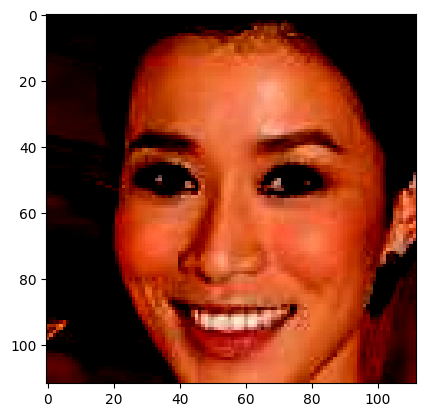

In [5]:
plt.imshow(people_set[1][0].permute(1, 2, 0))

### Модель

Ниже определен класс для используемое модели. Для удобства обучения мы работаем с библиотекой pytorhc_lightning и испольщуем класс ```pl.LightningModule```.

In [6]:
#class DummyArcFaceLoss(torch.nn.Module):
#  def __init__(self, m = 0.5, s = 30.0, num_classes = 8):
#    super(DummyArcFaceLoss, self).__init__()
#    self.m = torch.tensor(m)
#    self.s = torch.tensor(s)
#    self.nc = num_classes
#  def forward(self, logits, target):
#    tar_OH = F.one_hot(target, num_classes=self.nc)
#    log_sum = (torch.exp(logits*self.s) * (1. - tar_OH)).sum(dim = 1)
#    log_true = (torch.exp(logits*self.s) * tar_OH).sum(dim = 1)
#    arc_loss = - (torch.log(log_true/(log_true + log_sum))).mean()
#    return arc_loss

In [7]:
#torch.clamp(torch.tensor(4), min = -1., max = 1.)

In [8]:
class ArcFaceLoss(torch.nn.Module):
  def __init__(self, m = 0.5, s = 30.0, num_classes = 8):
    super(ArcFaceLoss, self).__init__()
    self.m = torch.tensor(m)
    self.s = torch.tensor(s)
    self.nc = num_classes
  def forward(self, logits, target):
    tar_OH = F.one_hot(target, num_classes=self.nc)
    log_sum = (torch.exp(logits*self.s) * (1. - tar_OH)).sum(dim = 1)
    print("number of logits with norm larger or equal than 1: ", len(logits[abs(logits) >= 1.]))
    arccos = (torch.arccos(torch.clamp(logits, min = -1., max = 1.))*tar_OH).sum(dim = 1)
    cos_of_sum = torch.cos(arccos + self.m)*self.s
    log_true = torch.exp(cos_of_sum)
    arc_loss = - (cos_of_sum - torch.log(log_true + log_sum + 1e-5)).mean()
    return arc_loss
class MyArcFaceLoss(torch.nn.Module):
    def __init__(self, m = 0.5, s = 30.0, num_classes = 8):
        super(MyArcFaceLoss, self).__init__()
        self.m = torch.tensor(m)
        self.s = torch.tensor(s)
        self.nc = num_classes
    def forward(self, logits, target):
        logits = logits.clamp(-0.999, 0.999)
        tar_OH = F.one_hot(target, num_classes=self.nc)
        logits_with_true_class = logits[torch.where(tar_OH)]
        logits_with_other_class = logits[torch.where(tar_OH==0)].reshape(logits.shape[0], logits.shape[1]-1)
        exp_with_other_class = torch.exp(logits_with_other_class*self.s)
        angle_with_true_class = torch.arccos(logits_with_true_class)
        exp_with_true_class = torch.exp(torch.cos(angle_with_true_class + self.m)*self.s)

        arc_loss = -torch.log(exp_with_true_class / (torch.sum(exp_with_other_class, dim=1) + exp_with_true_class)).mean()
        return arc_loss

In [9]:
class MetricLearningModel(pl.LightningModule):
    """Lightning wrapper for a Metric Learning model."""
    def __init__(
        self, backbone: torch.nn.Module, loss: torch.nn.Module, num_labels: int
    ) -> None:
        """Initialize MetricLearningModel.

        :param backbone: core deef model to be trained
        :param loss: loss function to be used
        :param num_labels: number of target classes (people)
        """
        super().__init__()

        self.backbone = backbone
        self.loss = loss

        # parameters of the last linear layer initialized by the 'kaiming_uniform_'
        self.softmax_weights = torch.nn.Parameter(torch.empty((num_labels, 2)))
        torch.nn.init.kaiming_uniform_(self.softmax_weights, a=math.sqrt(5))

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """Forward pass through the model.

        :param x: batch of images
        :return a tuple of:
            - features: outputs of the backbone model a.k.a. embeddings
            - logits: result of the last linear transformations
        """
        backbone_outputs = self.backbone(x)
        features = backbone_outputs["feature"]
        norm_weights = F.normalize(self.softmax_weights, dim=1)
        logits = F.linear(features, norm_weights)
        return features, logits

    def training_step(self, batch: Tuple[torch.Tensor, torch.Tensor]) -> torch.Tensor:
        """Do a training step of the model.

        :param batch: batch of input images
        :return: value of the loss function
        """
        images, labels = batch
        
        features, logits = self(images)
        loss = self.loss(logits, labels)
        # log loss value
        self.log("train_loss", loss.item(), prog_bar=True)
        return loss

    def configure_optimizers(self) -> Dict[str, torch.optim.Optimizer]:
        params = list(self.parameters()) #+ [self.softmax_weights] #list(self.linear_norm.parameters())
        optimizer = torch.optim.AdamW(params, lr=1e-4, weight_decay=5e-5)
        return {
            "optimizer": optimizer,
        }

### Инициализация модели

В качестве backbone-модели предлагается использовать глубокую сверточную сеть iResNet50. С ее арзитектурой можно ознакомиться в модуле ```iresent.py```.
В первом эксперименте мы используем стандартную функцию потерь SoftMax, определенную в ```torch.nn```.
Для удобства визуализации мы используем пространство представлений размерности $2$ (```num_features=2```).

In [10]:
from iresnet import iresnet50_normalized
backbone_model = iresnet50_normalized(num_features=2)
arcface_loss = MyArcFaceLoss(s=5) #ArcFaceLoss() # 

arcface_model = MetricLearningModel(backbone_model, arcface_loss, num_labels = num_people)

### Обучение модели

Определяем стандартные гиперпараметры и обучаем модель в течение 20 эпох.
Для обучения используем интерфейс ```pytorch_lightning```.

In [11]:
batch_size = 128
num_workers = 2
max_epochs = 15

In [12]:
# initialize trainer, use one GPU for training
trainer = Trainer(
    max_epochs=max_epochs,
    default_root_dir="outputs/softmax_train",
    accelerator="gpu",
    devices=1
)

# create train dataloader
train_dataloader = DataLoader(
    people_set,
    batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=num_workers,
)

# fit the model
trainer.fit(arcface_model, train_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A10') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name     | Type          | Params
-------------------------------------------
0 | backbone | IResNetNorm   | 30.8 M
1 | loss     | MyArcFaceLoss | 0     
-------------------------------------------
30.8 M    Trainable params
2         Non-trainable params
30.8 M    Total params
123.178   Total estimated model params size (MB)


Epoch 0:   0%|          | 0/34 [00:00<?, ?it/s] 

/home/erlygin/miniconda/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 88 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/erlygin/miniconda/lib/python3.9/site-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (34) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 14: 100%|██████████| 34/34 [00:58<00:00,  1.72s/it, v_num=46, train_loss=1.380]

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 14: 100%|██████████| 34/34 [00:59<00:00,  1.75s/it, v_num=46, train_loss=1.380]


### Получение представлений

Ниже приведена функция для получения представлений изображений из ```test_dataloader```.

In [13]:
def predict_features(
    model: pl.LightningModule, test_dataloader: DataLoader, device: str = "cuda"
) -> Tuple[np.array, np.array]:
    """Transform images and get their embeddings.

    :param model: trained MetricLearningModel
    :param test_dataloader: DataLoader with images to be transformed
    :param device: 'gpu' or 'cuda', if available
    :return a tuple of:
        - numpy array with obtained features
        - true image labels (people id's)
    """
    model.to(device)

    # switch model to 'eval' mode: disable randomness, dropout, etc.
    model.eval()

    predicted_features = []
    image_labels = []

    for images, labels in tqdm(test_dataloader):
        images = images.to(device)
        features, _ = model(images)
        features = features.detach().cpu().numpy()
        labels = labels.numpy()
        predicted_features.append(features)
        image_labels.append(labels)

    predicted_features = np.concatenate(predicted_features)
    image_labels = np.concatenate(image_labels)

    return predicted_features, image_labels

In [14]:
num_people = 8

dataset = ArcFaceDataset(path_to_data, num_labels=num_people, test=True)
people_ids = np.where(np.isin(dataset.labels, dataset.top_labels))[0]
people_set = torch.utils.data.Subset(dataset, people_ids)

test_dataloader = DataLoader(
    people_set,
    batch_size=16,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers,
)

#predicted_features, image_labels = predict_features(softmax_model, test_dataloader)

In [15]:
predicted_features, image_labels = predict_features(arcface_model, test_dataloader)

100%|██████████| 280/280 [00:17<00:00, 15.67it/s]


In [16]:
predicted_features

array([[ 0.9561469 , -0.29288748],
       [ 0.9220138 , -0.38715693],
       [ 0.9979909 , -0.06335667],
       ...,
       [-0.99751955, -0.07038987],
       [-0.99950767, -0.03137751],
       [-0.9940095 ,  0.10929406]], dtype=float32)

### Визуализация 2-мерных представлений

In [17]:
colors = list(mcolors.TABLEAU_COLORS)[:num_people]

softmax_weights = arcface_model.softmax_weights.detach().cpu()
softmax_weights = F.normalize(softmax_weights, dim=1).numpy()

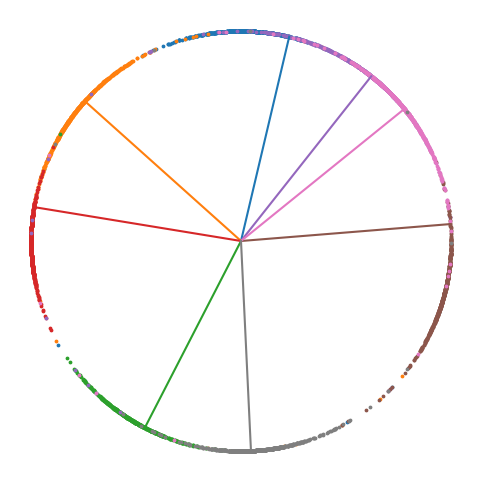

In [18]:
plt.figure(figsize=(6, 6))
for i, (weight, color) in enumerate(zip(softmax_weights, colors)):
    points = predicted_features[image_labels == i]
    x, y = [0, weight[0]], [0, weight[1]]
    plt.plot(x, y, marker="", c=color)
    plt.scatter(points[:, 0], points[:, 1], color=color, s=3)
    if i == (num_people - 1):
        break
plt.gca().set_aspect("equal")
plt.axis("off")
plt.show()

In [19]:
# plt.figure(figsize=(6, 6))
# for i, (weight, color) in enumerate(zip(softmax_weights, colors)):
#     points = predicted_features[image_labels == i]
#     x, y = [0, weight[0]], [0, weight[1]]
#     plt.plot(x, y, marker="", c=color)
#     plt.scatter(points[:, 0], points[:, 1], color=color, s=3)
#     if i == (num_people - 1):
#         break
# plt.gca().set_aspect("equal")
# plt.axis("off")
# plt.show()

## Решение

In [ ]:
class ArcFaceLoss(torch.nn.Module):
  def __init__(self, m = 0.5, s = 10.0, num_classes = 8):
    super(ArcFaceLoss, self).__init__()
    self.m = torch.tensor(m)
    self.s = torch.tensor(s)
    self.nc = num_classes
  def forward(self, logits, target):
    tar_OH = F.one_hot(target, num_classes=self.nc)
    log_sum = (torch.exp(logits*self.s) - torch.exp(logits*self.s)*tar_OH).sum(axis = 1)
    cos_of_sum = (logits*torch.cos(self.m) - (torch.where(torch.abs(logits) < 1, (1 - logits**2)**0.5, 0.))*torch.sin(self.m))*self.s
    log_true = (torch.exp(cos_of_sum)*tar_OH).sum(axis = 1)
    arc_loss = - torch.log(log_true / (log_true + log_sum + 0.0001)).mean()
    return arc_loss

In [ ]:
logits = torch.tensor(
    [
        [0.9, 0.1, -0.1],
        [0.0, 0.8, 0.1],
        [-0.5, -0.1, 0.5]
    ]
)

In [ ]:
target = torch.tensor([0, 1, 2])

In [ ]:
arc_loss = ArcFaceLoss(num_classes = 3)

In [ ]:
arc_loss(logits, target)

tensor(0.1086)

## Выводы

In [13]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn.utils import spectral_norm


__all__ = ["iresnet18", "iresnet34", "iresnet50", "iresnet100"]


def add_sn(m, n_power_iterations=3):
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        # print(dir(m))
        return spectral_norm(m, n_power_iterations=n_power_iterations)
    else:
        return m


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(
        in_planes,
        out_planes,
        kernel_size=3,
        stride=stride,
        padding=dilation,
        groups=groups,
        bias=False,
        dilation=dilation,
    )


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class IBasicBlock(nn.Module):
    expansion = 1

    def __init__(
        self,
        inplanes,
        planes,
        stride=1,
        downsample=None,
        groups=1,
        base_width=64,
        dilation=1,
    ):
        super(IBasicBlock, self).__init__()
        if groups != 1 or base_width != 64:
            raise ValueError("BasicBlock only supports groups=1 and base_width=64")
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        self.bn1 = nn.BatchNorm2d(
            inplanes,
            eps=1e-05,
        )
        self.conv1 = conv3x3(inplanes, planes)
        self.bn2 = nn.BatchNorm2d(
            planes,
            eps=1e-05,
        )
        self.prelu = nn.PReLU(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn3 = nn.BatchNorm2d(
            planes,
            eps=1e-05,
        )
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x
        out = self.bn1(x)
        out = self.conv1(out)
        out = self.bn2(out)
        out = self.prelu(out)
        out = self.conv2(out)
        out = self.bn3(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        return out


class IResNet(nn.Module):
    fc_scale = 7 * 7

    def __init__(
        self,
        block,
        layers,
        dropout=0,
        num_features=512,
        zero_init_residual=False,
        groups=1,
        width_per_group=64,
        replace_stride_with_dilation=None,
        fp16=False,
        learnable=True,
    ):
        super(IResNet, self).__init__()
        self.fp16 = fp16
        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError(
                "replace_stride_with_dilation should be None "
                "or a 3-element tuple, got {}".format(replace_stride_with_dilation)
            )
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(
            3, self.inplanes, kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn1 = nn.BatchNorm2d(self.inplanes, eps=1e-05)
        self.prelu = nn.PReLU(self.inplanes)
        self.layer1 = self._make_layer(block, 64, layers[0], stride=2)
        self.layer2 = self._make_layer(
            block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0]
        )
        self.layer3 = self._make_layer(
            block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1]
        )
        self.layer4 = self._make_layer(
            block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2]
        )
        self.bn2 = nn.BatchNorm2d(
            512 * block.expansion,
            eps=1e-05,
        )
        self.dropout = nn.Dropout(p=dropout, inplace=True)
        self.fc = nn.Linear(512 * block.expansion * self.fc_scale, num_features)
        self.features = nn.BatchNorm1d(num_features, eps=1e-05)
        nn.init.constant_(self.features.weight, 1.0)
        self.features.weight.requires_grad = False

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, 0, 0.1)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, IBasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

        if learnable is False:
            for p in self.modules():
                p.requires_grad = False

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(
                    planes * block.expansion,
                    eps=1e-05,
                ),
            )
        layers = []
        layers.append(
            block(
                self.inplanes,
                planes,
                stride,
                downsample,
                self.groups,
                self.base_width,
                previous_dilation,
            )
        )
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(
                block(
                    self.inplanes,
                    planes,
                    groups=self.groups,
                    base_width=self.base_width,
                    dilation=self.dilation,
                )
            )

        return nn.Sequential(*layers)

    def forward(self, x):
        with torch.cuda.amp.autocast(self.fp16):
            x = self.conv1(x)
            x = self.bn1(x)
            x = self.prelu(x)
            x = self.layer1(x)
            x = self.layer2(x)
            x = self.layer3(x)
            x = self.layer4(x)
            x = self.bn2(x)
            x = torch.flatten(x, 1)
            x = self.dropout(x)
        sig_x = x.float() if self.fp16 else x
        x = self.fc(x.float() if self.fp16 else x)
        x = self.features(x)
        output = {
            "feature": x,
            "bottleneck_feature": sig_x,
        }
        return output


class IResNetNorm(IResNet):
    def forward(self, x):
        res = super(IResNetNorm, self).forward(x)
        res["feature"] = F.normalize(res["feature"], p=2.0, dim=1)
        return res


class IResNetSpectral(IResNet):
    def __init__(self, *args, n_power_iterations=3, **kwargs):
        super(IResNetSpectral, self).__init__(*args, **kwargs)
        self.apply(lambda m: add_sn(m, n_power_iterations=n_power_iterations))


class IResNetNormSpectral(IResNetNorm):
    def __init__(self, *args, n_power_iterations=3, **kwargs):
        super(IResNetNormSpectral, self).__init__(*args, **kwargs)
        self.apply(lambda m: add_sn(m, n_power_iterations=n_power_iterations))


def _iresnet(arch, block, layers, pretrained, progress, **kwargs):
    model = IResNet(block, layers, **kwargs)
    if pretrained:
        raise ValueError()
    return model


def _iresnet_normalized(arch, block, layers, pretrained, progress, **kwargs):
    model = IResNetNorm(block, layers, **kwargs)
    if pretrained:
        raise ValueError()
    return model


def _iresnet_spectral(arch, block, layers, pretrained, progress, **kwargs):
    model = IResNetSpectral(block, layers, **kwargs)
    if pretrained:
        raise ValueError()
    return model


def _iresnet_spectral_normalized(arch, block, layers, pretrained, progress, **kwargs):
    model = IResNetNormSpectral(block, layers, **kwargs)
    if pretrained:
        raise ValueError()
    return model


def iresnet18(pretrained=False, progress=True, **kwargs):
    return _iresnet(
        "iresnet18", IBasicBlock, [2, 2, 2, 2], pretrained, progress, **kwargs
    )


def iresnet34(pretrained=False, progress=True, **kwargs):
    return _iresnet(
        "iresnet34", IBasicBlock, [3, 4, 6, 3], pretrained, progress, **kwargs
    )


def iresnet50(pretrained=False, progress=True, **kwargs):
    return _iresnet(
        "iresnet50", IBasicBlock, [3, 4, 14, 3], pretrained, progress, **kwargs
    )


def iresnet100(pretrained=False, progress=True, **kwargs):
    return _iresnet(
        "iresnet100", IBasicBlock, [3, 13, 30, 3], pretrained, progress, **kwargs
    )


def iresnet50_normalized(pretrained=False, progress=True, **kwargs):
    return _iresnet_normalized(
        "iresnet50", IBasicBlock, [3, 4, 14, 3], pretrained, progress, **kwargs
    )


def iresnet50_spectral_normalized(pretrained=False, progress=True, **kwargs):
    return _iresnet_spectral_normalized(
        "iresnet50", IBasicBlock, [3, 4, 14, 3], pretrained, progress, **kwargs
    )